In [88]:
    from IPython.core.display import display, HTML
    display(HTML("""
    <style>
         #notebook { padding-top:0px !important; }
         .container { width:100% !important; }
         .end_space { min-height:0px !important; }
         div.prompt { min-width:0px; }
         .prompt { min-width:0px; }
         .output_area { background-color:#eeeeee;}
      </style>"""))

In [154]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pylab import rcParams

rcParams['figure.figsize'] = 5, 5

In [155]:
def simu(initS, initI, initR, beta, gamma, max_days=60):
    S=list()
    I=list()
    R=list()
    currentS=initS
    currentI=initI
    currentR=initR
    S.append(currentS)
    I.append(currentI)
    R.append(currentR)
    
    N = initR+initI+initS
    # If a constant is provided for beta, transform it into a list
    if not isinstance(beta, list):
        beta = [beta]*max_days
    for day in range(max_days):
        N = currentS+currentI+currentR
        dS = -beta[day]*currentI*currentS/N
        dI = beta[day]*currentI*currentS/N - gamma*currentI
        dR = gamma*currentI
        currentR += dR
        currentI += dI
        currentS += dS
        S.append(currentS)
        I.append(currentI)
        R.append(currentR)
    return S,I,R

In [156]:
def plot(series, labels, logscale=False, xlabel='days', thresh=None):
    fig, ax = plt.subplots()
    
    for i in range(len(series)):
        t = list(range(len(series[i])))
        ax.plot(t, series[i], label = labels[i])
    if logscale:
        ax.set_yscale('log')
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.axes.ticklabel_format(style='plain', useOffset=False, axis='both')    
    if thresh is not None:
        plt.axhline(y=thresh, color='black', linestyle='--')
    
    plt.xlabel(xlabel, fontsize=18)
    plt.legend()
    plt.show()

![](imgs/modele1.png)

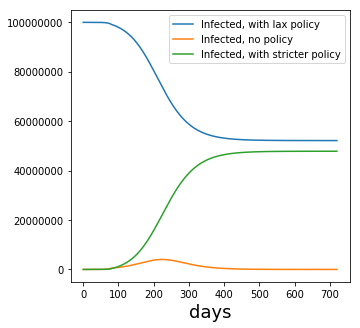

In [157]:
beta = [0.18]*80+[0.09]*(720-80)
S4,I4,R4 = simu(99999900,100,0, beta, gamma=1/15, max_days=720)
plot([S4, I4, R4], ["Infected, with lax policy", "Infected, no policy", "Infected, with stricter policy", "Infected, with lax policy and early end"])

![](imgs/modele2.png)

In [158]:
def simu2(initS, initI, initR, initD, beta, gamma, mort, policy, max_days=60):
    S = list()
    I = list()
    R = list()
    D = list()
    Eco = list()
    currentS=initS
    currentI=initI
    currentR=initR
    currentD=initD
    currentEco=0
    S.append(currentS)
    I.append(currentI)
    R.append(currentR)
    D.append(currentD)
    Eco.append(currentEco)
    
    N = initR+initI+initS+initD
    for day in range(max_days):
        N = currentS+currentI+currentR
        StoI = beta*policy[day]*currentI*currentS/N
        if currentI<100:
            StoI=0
        ItoR = gamma*currentI
        ItoD = mort*currentI
        dS = -StoI
        dI = StoI - ItoR - ItoD
        dR = ItoR
        dD = ItoD
        currentR += dR
        currentI += dI
        currentS += dS
        currentD += dD
        currentEco += policy[day] * (currentS+currentR)/N
        
        S.append(currentS)
        I.append(currentI)
        R.append(currentR)
        D.append(currentD)
        Eco.append(currentEco)
        
    return S,I,R,D, Eco

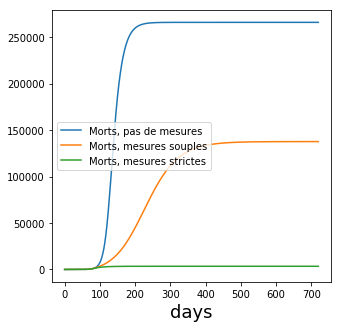

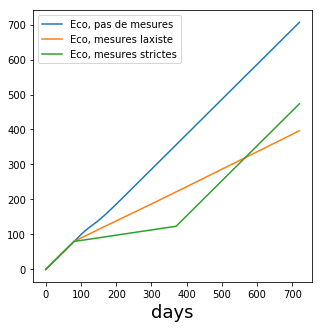

In [159]:
policy = [1.0]*720
beta = [0.18]*720
S,I,R,D,E = simu2(99999900,100,0,0, 
                beta=0.18, gamma=1/15, mort=0.0029/15, 
                policy = policy,
                max_days=720)
beta = [0.18]*80+[0.09]*(720-80)

policy = [1.0]*80 + [0.5]*720
S2,I2,R2,D2,E2 = simu2(99999900,100,0,0, 
                    beta=0.18, gamma=1/15, mort=0.0029/15, 
                    policy=policy,
                    max_days=720)

policy = [1.0]*80 + [0.15]*290 + [1.0]*700
S3,I3,R3,D3,E3 = simu2(99999900,100,0,0, 
                    beta=0.18, gamma=1/15, mort=0.0029/15, 
                    policy=policy,
                    max_days=720)

plot([D, D2, D3], 
     ["Morts, pas de mesures",
      "Morts, mesures souples",
      "Morts, mesures strictes"])
plot([E, E2, E3], ["Eco, pas de mesures",
                  "Eco, mesures laxiste",
                  "Eco, mesures strictes"])


![](imgs/modele3.png)

In [160]:
10/14 * (1/10) + 4/14 * (1/15)

0.09047619047619049

In [161]:
StoI = beta*policy[day]*currentI*currentS/N
ItoC = crit_ratio*I # 0.04/15
ItoR = (1-crit_ratio)*I
CtoH = 1.0 jusqu'à saturation
CtoD = (mort_nh)*C # 1.0
CtoR = (recov_nh)*C # 0.0
HtoD = mort_h * H  # 0.5/9
HtoR = recov_h * H #0.5/9


SyntaxError: invalid syntax (<ipython-input-161-c6d30917303e>, line 4)

In [162]:
67e6 /1000 * 6.5

435500.0

In [215]:
def simu3(initS, initI, initR=0, initH=0, initD=0, initC=0,
          beta = 0.18, 
          crit_ratio = 0.04/15, 
          noncrit_recov_ratio = 0.96/15,
          mort_nh = 1.0,
          mort_h = 0.5/9, 
          recov_nh = 0.0,
          recov_h = 0.5/9,
          hospital_capa = 10000,
          policy=[], max_days=60):
    S = list()
    I = list()
    H = list()
    R = list()
    C= list()
    D = list()
    Eco = list()
    currentS=initS
    currentI=initI
    currentR=initR
    currentC=initC
    currentH=initH
    currentD=initD
    currentEco=0
    S.append(currentS)
    I.append(currentI)
    R.append(currentR)
    H.append(currentH)
    D.append(currentD)
    C.append(currentC)
    Eco.append(currentEco)
    
    if len(policy)<max_days:
        policy = policy + [policy[-1]]*(max_days-len(policy))
    
    N = initR+initI+initS+initD+initC+initH
    for day in range(max_days):
        N = currentS+currentI+currentR+currentD+currentH+currentC
        
        StoI = beta*policy[day]*currentI*currentS/N
        if currentI<100:
            StoI=0
        ItoC = crit_ratio*currentI
        ItoR = noncrit_recov_ratio*currentI
        dS = -StoI
        dI = StoI - ItoR - ItoC
        currentI += dI
        currentS += dS
        currentC += ItoC
        
        # Critical become hospitalized, until saturation
        CtoH = min(currentC, hospital_capa - currentH)
        currentC -= CtoH
        currentH += CtoH
        
            
        CtoD = (mort_nh)*currentC 
        CtoR = (recov_nh)*currentC
        HtoD = mort_h * currentH  
        HtoR = recov_h * currentH 

        dR = ItoR + CtoR + HtoR
        dC = -CtoR - CtoD
        dH = CtoH - HtoR - HtoD
        dD = HtoD + CtoD
        
        currentR += dR
        currentC += dC
        currentH += dH
        currentD += dD
        currentEco += policy[day] * (currentS+currentR)/N
        
        C.append(currentC)
        S.append(currentS)
        I.append(currentI)
        R.append(currentR)
        H.append(currentH)
        D.append(currentD)
        Eco.append(currentEco)
        
    return S,I,C,H,R,D, Eco

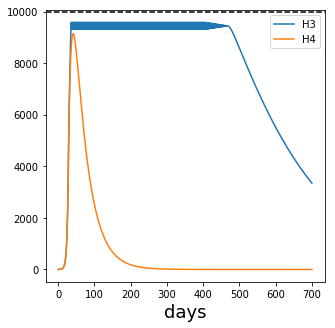

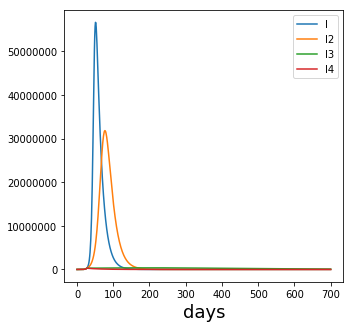

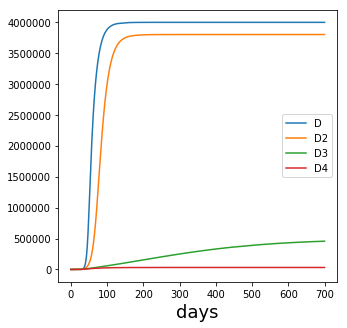

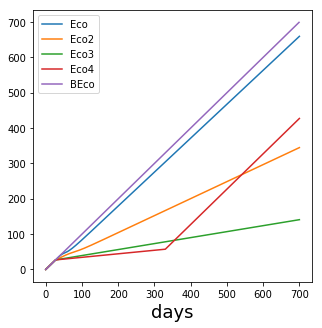

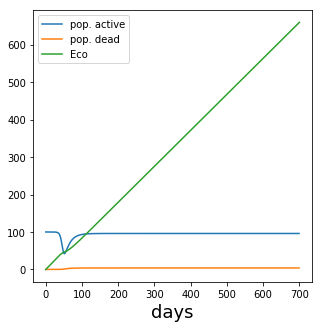

In [230]:
policy = [1.0]*720
beta = 0.41
maxd = 700
S,I,C,H,R,D, Eco = simu3(99999900,100,0,0,0, 
                beta=beta,
                policy = policy,
                max_days=maxd)

policy = [1.0]*27 + [0.5]
S2,I2,C2,H2,R2,D2, Eco2 = simu3(99999900,100,0,0,0, 
                beta=beta,
                policy = policy,
                max_days=maxd)

policy = [1.0]*27 + [0.17]
S3,I3,C3,H3,R3,D3, Eco3 = simu3(99999900,100,0,0,0, 
                beta=beta,
                policy = policy,
                max_days=maxd)


policy = [1.0]*27 + [0.1]*(330-27) + [1.0]
S4,I4,C4,H4,R4,D4, Eco4 = simu3(99999900,100,0,0,0, 
                beta=beta,
                policy = policy,
                max_days=maxd)


# for i in range(280,400):
#     print(i,I4[i])
plot([H3, H4],["H3", "H4"], thresh = 10000)
plot([I,I2, I3, I4],["I","I2", "I3", "I4"])
plot([D, D2, D3, D4],["D", "D2", "D3", "D4"])
BaseEco = list(range(maxd))
plot([Eco, Eco2, Eco3,Eco4, BaseEco],["Eco", "Eco2", "Eco3", "Eco4", "BEco"])

popact = list()
popdead = list()
for i in range(maxd):
    popact.append((S[i]+R[i])/(S[i]+R[i]+I[i]+H[i]+D[i])*100.0)
    popdead.append((D[i])/(S[i]+R[i]+I[i]+H[i]+D[i])*100.0)
plot([popact, popdead, Eco],["pop. active", "pop. dead", "Eco"] )

In [229]:
I

[100,
 134.33329233333333,
 180.4543115628532,
 242.41014633406124,
 325.6373603991239,
 437.43902520472,
 587.6255170965801,
 789.375291641842,
 1060.391136448836,
 1424.4533066095914,
 1913.5057273070856,
 2570.458141664124,
 3452.9497560845634,
 4638.4040359723485,
 6230.817114507467,
 8369.873519941137,
 11243.18555812689,
 15102.723917596963,
 20286.869667120078,
 27250.001756103542,
 36602.178534141975,
 49162.32721272084,
 66029.48584357959,
 88678.12805014444,
 119085.5368660232,
 159901.68790796658,
 214675.26064563688,
 288153.29736743745,
 386676.6607655747,
 518698.58449529303,
 695458.6245486968,
 931847.7507435889,
 1247499.2457029046,
 1668143.480197005,
 2227169.2131756814,
 2967418.5232784003,
 3942876.92245237,
 5220031.386637307,
 6877888.05334851,
 9005723.915318642,
 11696318.902321622,
 15032985.158625718,
 19067755.615643207,
 23791730.425591376,
 29101220.37947784,
 34772999.06580313,
 40465008.00446391,
 45760029.13099268,
 50248477.05995076,
 53624259.07390907

Mortalité: entre 0.21% et 0.37% en Allemagne (https://www.reddit.com/r/Coronavirus/comments/fxpeaz/interim_result_of_first_large_scale_study_in/)



Asymptomatiques: 
    - 50-75% en Italie (https://www.bmj.com/content/368/bmj.m1165)
    - 80% en Chine (https://www.bmj.com/content/369/bmj.m1375)
    
Confinement:
    - 34% des actifs vont toujours travailler sur site (enquête ifop) 
    (https://jean-jaures.org/sites/default/files/redac/commun/productions/2020/0804/rapport_ifop-fjj_2020.04.01.pdf)


À lire, (actifs, confinement) https://www.affiches-parisiennes.com/sondage-ifop-34-des-francais-se-rendent-encore-sur-leur-lieu-travail-pour-exercer-10079.html